# Cat and Dog Classification

In [19]:
# downloading data
!curl -L -f -o cat-classification-data.zip\
https://www.kaggle.com/api/v1/datasets/download/ankushhv/cat-classification-data

# unzipping data
!unzip -q -f cat-classification-data.zip

# removing the zip file
!rm cat-classification-data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2723k  100 2723k    0     0  1574k      0  0:00:01  0:00:01 --:--:-- 7684k


In [20]:
# imports
import torch
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from nn import *
from functions import *

train_fileloc = 'train_catvnoncat.h5'
test_fileloc = 'test_catvnoncat.h5'

In [24]:
def load_data(train_fileloc: str, test_fileloc: str):
    train_dataset = h5py.File(train_fileloc, "r")
    train_set_x_orig = torch.tensor(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = torch.tensor(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_fileloc, "r")
    test_set_x_orig = torch.tensor(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = torch.tensor(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [25]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(train_fileloc, test_fileloc)
# print(f"Train_x_orig:{train_x_orig}\nTrain_y:{train_y}\nTest_x_orig:{test_x_orig}\nTest_y:{test_y}\nClasses:{classes}")

y = tensor(0). It's a non-cat picture.


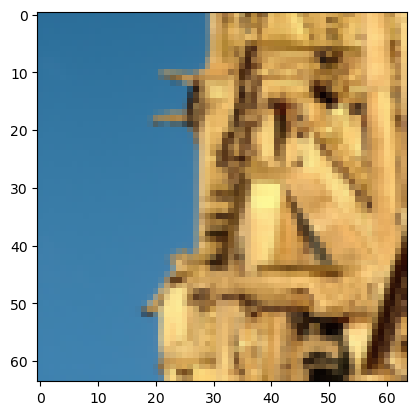

In [26]:
index = 69
plt.imshow(train_x_orig[index].cpu().numpy())
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [27]:
# Explore dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: torch.Size([209, 64, 64, 3])
train_y shape: torch.Size([1, 209])
test_x_orig shape: torch.Size([50, 64, 64, 3])
test_y shape: torch.Size([1, 50])


train_x's shape: torch.Size([209, 12288])
test_x's shape: torch.Size([50, 12288])


Epochs :   0%|          | 0/2500 [00:00<?, ?it/s]

Cost at iteration 0: 10088.1806640625
Cost at iteration 100: 12777.455078125
Cost at iteration 200: 14273.69921875
Cost at iteration 300: 14814.076171875
Cost at iteration 400: 15060.537109375
Cost at iteration 500: 15196.529296875
Cost at iteration 600: 15245.87109375
Cost at iteration 700: 15325.0810546875
Cost at iteration 800: 15351.10546875
Cost at iteration 900: 15445.7978515625
Cost at iteration 1000: 15549.76953125
Cost at iteration 1100: 15675.7265625
Cost at iteration 1200: 15755.7880859375
Cost at iteration 1300: 15906.9580078125
Cost at iteration 1400: 16042.7314453125
Cost at iteration 1500: 16176.798828125
Cost at iteration 1600: 16335.97265625
Cost at iteration 1700: 16522.859375
Cost at iteration 1800: 16683.42578125
Cost at iteration 1900: 16865.828125
Cost at iteration 2000: 17058.0625
Cost at iteration 2100: 17293.57421875
Cost at iteration 2200: 17568.31640625
Cost at iteration 2300: 17822.826171875
Cost at iteration 2400: 18123.4453125
Cost at iteration 2499: 18427

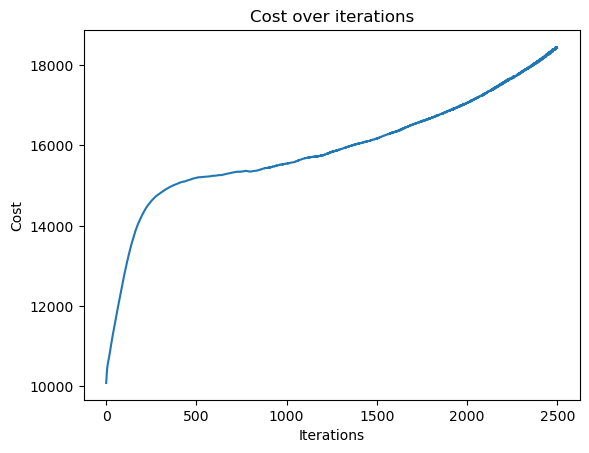

Train accuracy: 0.8756
Test accuracy: 0.6400


In [29]:
# Data preparation
train_x = train_x_orig.view(m_train, -1) / 255
test_x = (test_x_orig.view(m_test, -1) / 255)

train_y = train_y.view(1, -1)
test_y = test_y.view(1, -1)

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

# Define the model architecture
layers_dims = [12288, 64, 32, 16, 1]  # Simplified architecture

# Create and train the model
model = NeuralNetwork(layers_dims)
costs = model.train(train_x, train_y, num_iterations=2500, learning_rate=0.001)

# Plot the costs
import matplotlib.pyplot as plt
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Evaluate the model
train_accuracy = model.evaluate(train_x, train_y)
test_accuracy = model.evaluate(test_x, test_y)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

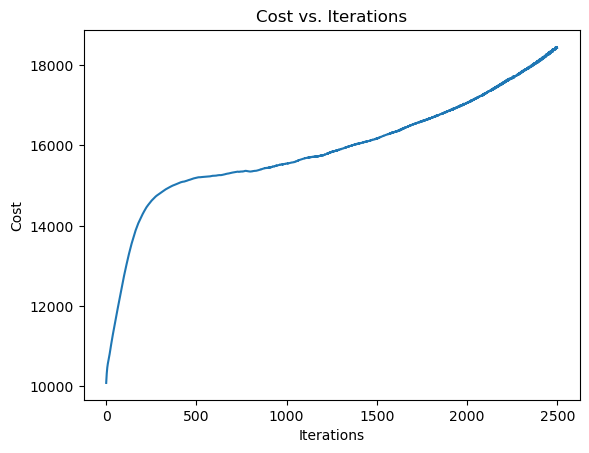

In [30]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [31]:
train_accuracy = model.evaluate(train_x, train_y)
test_accuracy = model.evaluate(test_x, test_y)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8756
Test accuracy: 0.6400
